In [1]:
import pandas as pd
import numpy as np
import glob
all_files=glob.glob("Pandas/states*.csv")
li=[]
for filename in all_files:
    df=pd.read_csv(filename,index_col=None,header=0)
    li.append(df)
us_census=pd.concat(li,axis=0,ignore_index=True)
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [2]:
us_census.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [4]:
us_census[['Male','Female']]=us_census.GenderPop.str.split("_",expand=True)

In [5]:
us_census.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,$70354.74390243902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,$67264.78230266465,19087135M_19334329F,19087135M,19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,$64657.801787164906,2648667M_2630239F,2648667M,2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F,2648667M,2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F,1751607M,1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F,448413M,478041F
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F,306674M,340810F


In [6]:
us_census.drop(columns=['GenderPop'],inplace=True)

In [7]:
us_census=us_census.replace('%','',regex=True)
us_census=us_census.replace('F','',regex=True) 
us_census=us_census.replace('M','',regex=True)
us_census['Income']=us_census.Income.str.strip('$')

In [8]:
us_census.loc[:,'Hispanic':'Income']=round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),3)

In [16]:
us_census.head()
#us_census.dtypes

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.359,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.744,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.821,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.634,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.782,19087135,19334329


In [12]:
us_census['Male']=us_census['Male']=us_census['Male'].astype(int)

In [17]:
np.where(us_census.applymap(lambda x:x==''))

(array([23, 24, 31], dtype=int64), array([10, 10, 10], dtype=int64))

In [18]:
 us_census.drop(columns=['Female'],inplace=True)

In [19]:
us_census['Female']=us_census['TotalPop']-us_census['Male']

In [20]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.750,61.880,31.250,0.450,1.050,0.030,43296.359,2341093,2489527
1,Alaska,733375,5.910,60.910,2.850,16.390,5.450,1.060,70354.744,384160,349215
2,Arizona,6641928,29.570,57.120,3.850,4.360,2.880,0.170,54207.821,3299088,3342840
3,Arkansas,2958208,6.220,71.140,18.970,0.520,1.140,0.150,41935.634,1451913,1506295
4,California,38421464,37.290,40.220,5.680,0.410,13.050,0.350,67264.782,19087135,19334329
5,Colorado,5278906,20.780,69.900,3.550,0.570,2.660,NaN,64657.802,2648667,2630239
6,Colorado,5278906,20.784,69.896,3.546,0.574,2.662,NaN,64657.802,2648667,2630239
7,Connecticut,3593222,15.605,67.677,10.348,0.126,4.022,0.019,76146.561,1751607,1841615
8,Delaware,926454,8.825,64.633,20.744,0.260,3.269,NaN,61827.977,448413,478041
9,District of Columbia,647484,9.166,33.104,51.777,0.201,3.383,0.030,75466.364,306674,340810


In [21]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int32
Female        int64
dtype: object

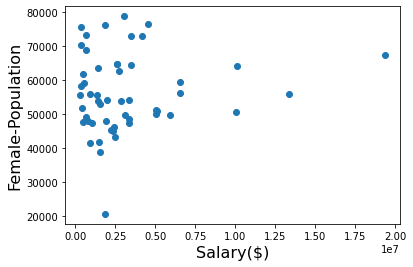

In [27]:
import matplotlib.pyplot as plt
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary($)',fontsize=16)
plt.ylabel('Female-Population',fontsize=16)
plt.show()

In [29]:
us_census.duplicated().any()

False

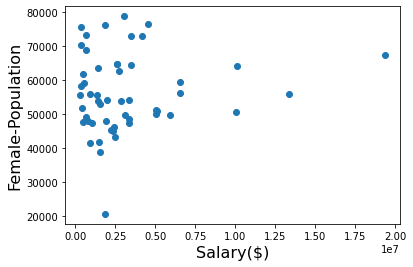

In [30]:
import matplotlib.pyplot as plt
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary($)',fontsize=16)
plt.ylabel('Female-Population',fontsize=16)
plt.show()


In [31]:
#Histograms of Races 13
histo=round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

In [32]:
histo

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0
5,1096957.0,3689955.0,187401.0,30090.0,140419.0,NaN
6,1097168.0,3689744.0,187190.0,30301.0,140524.0,NaN
7,560722.0,2431785.0,371827.0,4527.0,144519.0,683.0
8,81760.0,598795.0,192184.0,2409.0,30286.0,NaN
9,59348.0,214343.0,335248.0,1301.0,21904.0,194.0


In [33]:
  histo.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [35]:
histo.fillna(method='bfill',inplace=True)

In [36]:
 histo.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,683
6,1097168,3689744,187190,30301,140524,683
7,560722,2431785,371827,4527,144519,683
8,81760,598795,192184,2409,30286,194
9,59348,214343,335248,1301,21904,194


In [37]:
histo['Total_Pop']=us_census['TotalPop']
histo['state']=us_census['State']

array([[<AxesSubplot:title={'center':'Hispanic'}>]], dtype=object)

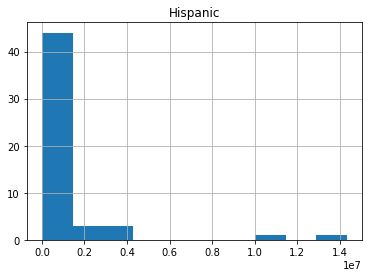

In [39]:
histo.hist(column='Hispanic')

array([[<AxesSubplot:title={'center':'White'}>]], dtype=object)

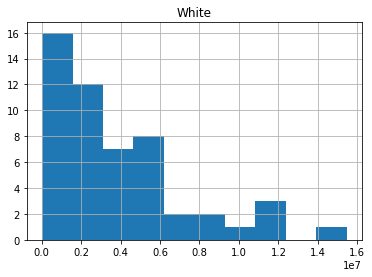

In [40]:
histo.hist(column='White')

array([[<AxesSubplot:title={'center':'Black'}>]], dtype=object)

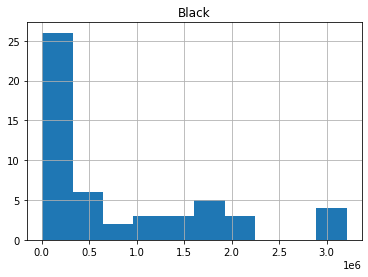

In [41]:
histo.hist(column='Black')

array([[<AxesSubplot:title={'center':'Native'}>]], dtype=object)

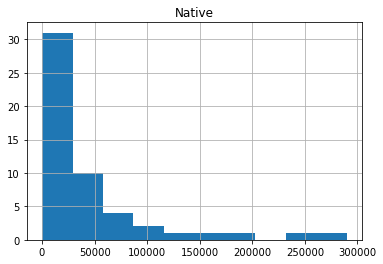

In [43]:
histo.hist(column='Native')

array([[<AxesSubplot:title={'center':'Asian'}>]], dtype=object)

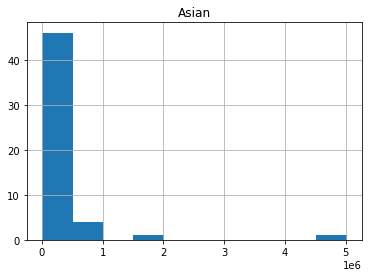

In [44]:
histo.hist(column='Asian')

array([[<AxesSubplot:title={'center':'Pacific'}>]], dtype=object)

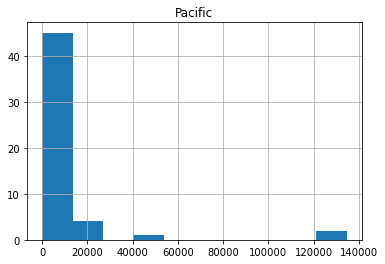

In [45]:
histo.hist(column='Pacific')